### Titanic - Prevendo sobreviventes ###

* Este algoritmo irá tentar  prever em uma lista de passageiros do Titanic se o mesmo sobreviveu ou não
* Para tanto, iremos comparar o desempenho de dois algoritmos de aprendizagem supervisionada (o K-nearest Neighbors e o Support Vector Machines)

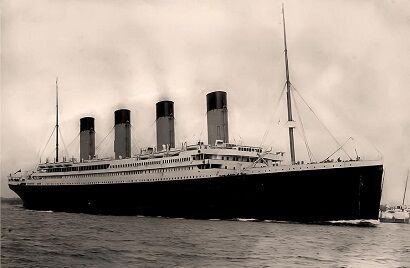

In [1]:
import IPython
url = 'https://www3.unicentro.br/petfisica/wp-content/uploads/sites/54/2015/10/rms-titanic-bill-cannon.jpg'
IPython.display.Image(url, width = 250)

In [2]:
# Importando as bibliotecas 

import pandas as pd

titanic = pd.read_csv("datasets/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Verificando missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Dropando colunas que não serão usadas no modelo 
titanic = titanic.drop(columns=["Name","Ticket","Cabin"])

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
# Converte colunas categóricas em numéricas, gerando novas colunas com a informação categórica
titanic = pd.get_dummies(titanic, drop_first=True)
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [9]:
# Separando a classe das features 
y = titanic['Survived']
X = titanic.drop(columns="Survived")

In [10]:
# Dividindo o modelo entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [12]:
# Preenchendo a feature Age com a média das idades
mean = X_train.mean()
X_train = X_train.fillna(mean)
X_test = X_test.fillna(mean)

In [13]:
# Padronizando as features
from sklearn.preprocessing import StandardScaler

# Escala os dados de treino e teste
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

**Utilizando KNN**

In [14]:
# Instanciando o KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
# Definindo o número de vizinhos (k=3)

In [15]:
### Treinando o modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [16]:
predicao = knn.predict(X_test)

In [17]:
from sklearn import metrics
metrics.accuracy_score(y_test,predicao)

0.7910447761194029

In [18]:
# Descobrindo os melhores parametros
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [19]:
# Descobrimos que uma qtd K de vizinhos = 12 obterá o melhor desempenho
gridsearch.best_params_

{'n_neighbors': 12}

In [20]:
predicao = gridsearch.predict(X_test)

In [29]:
acuracia = "{:.2%}".format(metrics.accuracy_score(y_test,predicao))
print("Nosso modelo teve uma acurácia de:",acuracia)

Nosso modelo teve uma acurácia de: 79.85%


**Utilizando SVM (Support Vectors Machine)**

In [30]:
from sklearn import svm
clf = svm.SVC().fit(X_train,y_train)

In [32]:
clf.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.model_selection import cross_val_predict

def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf,X,y,cv=5)
    return metrics.accuracy_score(y,resultados)

acuracia = "{:.2%}".format(Acuracia(clf,X_test,y_test))
print("Nosso modelo teve uma acurácia de:",acuracia)

Nosso modelo teve uma acurácia de: 80.60%


**O algoritmo com melhor desempenho nos parâmetros utilizados acima foi o SVM com uma acurácia de 80.6%**